In [2]:
import keras
keras.__version__

Using TensorFlow backend.


'2.1.1'

In [3]:
# 3. Import libraries and modules
import numpy as np
np.random.seed(123)  # for reproducibility
 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

In [39]:
# 4. Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print (X_train.shape)
# (60000, 28, 28)

(60000, 28, 28)


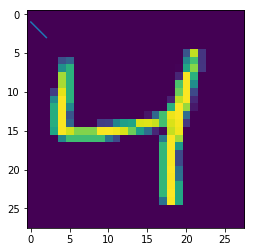

In [47]:
from matplotlib import pyplot as plt
import matplotlib
matplotlib.use('Qt4Agg', warn=False) #
plt.plot([1,2,3])
#plt.show(X_train[3].all())
plt.show()
plt.imshow(X_train[2])

In [49]:
# 5. Preprocess input data
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
 
# 6. Preprocess class labels
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
 
# 7. Define model architecture
model = Sequential()
 
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
 
# 8. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
# 9. Fit model on training data
model.fit(X_train, Y_train, 
          batch_size=32, epochs=10, verbose=1)
 
# 10. Evaluate model on test data
score = model.evaluate(X_test, Y_test, verbose=0)

Epoch 1/10
60000/60000 [==============================] - 162s 3ms/step - loss: 0.8204 - acc: 0.7303
Epoch 2/10
60000/60000 [==============================] - 153s 3ms/step - loss: 0.4610 - acc: 0.8565
Epoch 3/10
60000/60000 [==============================] - 146s 2ms/step - loss: 0.4177 - acc: 0.8693
Epoch 4/10
60000/60000 [==============================] - 144s 2ms/step - loss: 0.3917 - acc: 0.8790
Epoch 5/10
60000/60000 [==============================] - 144s 2ms/step - loss: 0.3759 - acc: 0.8833
Epoch 6/10
60000/60000 [==============================] - 145s 2ms/step - loss: 0.3613 - acc: 0.8877
Epoch 7/10
60000/60000 [==============================] - 143s 2ms/step - loss: 0.3517 - acc: 0.8912
Epoch 8/10
60000/60000 [==============================] - 141s 2ms/step - loss: 0.3404 - acc: 0.8935
Epoch 9/10
60000/60000 [==============================] - 145s 2ms/step - loss: 0.3285 - acc: 0.8984
Epoch 10/10
60000/60000 [==============================] - 144s 2ms/step - loss: 0.3203 - a

In [53]:
print('\nTest result: %.3f loss: %.3f' % (score[1]*100,score[0]))


Test result: 95.750 loss: 0.144
